<a href="https://colab.research.google.com/github/Riya23160/PracticeProjects/blob/main/Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression
Line equation :
y=mx+c

Gradient Descent:
w=w-a*dw
b=b-a*db

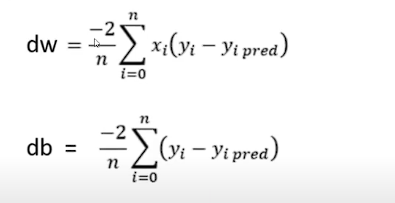

In [23]:
import numpy as np

In [104]:
class Linear_Regression():

  def __init__(self,learn_rate,no_of_iter):
    self.learn_rate=learn_rate
    self.no_of_iter=no_of_iter

  def fit(self,X,Y):
     #number of training examples and features
     self.m,self.n=X.shape #[30,1]

     self.w=np.zeros(self.n)
     self.b=0
     self.X=X
     self.Y=Y

     for i in range(self.no_of_iter):
        self.update_Weights()

  def update_Weights(self):
      Y_prediction=self.predict(self.X)
      dw=-(2*(self.X.T).dot(self.Y-Y_prediction))/self.m
      db=-2*np.sum(self.Y-Y_prediction)/self.m

      #updating weight

      self.w=self.w-self.learn_rate*dw
      self.b=self.b-self.learn_rate*db

  def predict(self,X):
    return X.dot(self.w)+self.b

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [106]:
df=pd.read_csv('/content/salary_data.csv')

In [107]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [108]:
df.isna().sum()

,0
YearsExperience,0
Salary,0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [110]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [111]:
df.shape

(30, 2)

In [112]:
X=df.drop('Salary',axis=1)
Y=df['Salary']

In [113]:
X.shape

(30, 1)

In [114]:
X


,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [115]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=2)

In [144]:
model=Linear_Regression(learn_rate=0.01,no_of_iter=1000)

In [145]:
model.fit(X_train,Y_train)

In [146]:
print('weignt',model.w[0])
print('bias',model.b)

weignt 9580.301196603597
bias 23226.38946603212


/tmp/ipython-input-1966244424.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('weignt',model.w[0])


In [147]:
train_pred=model.predict(X_test)


In [148]:
print(train_pred)

1      35680.781022
0      33764.720782
14     66337.744851
9      58673.503893
21     91246.527962
19     80708.196646
23    101784.859278
6      51967.293056
3      42386.991859
20     88372.437603
dtype: float64


Visualising


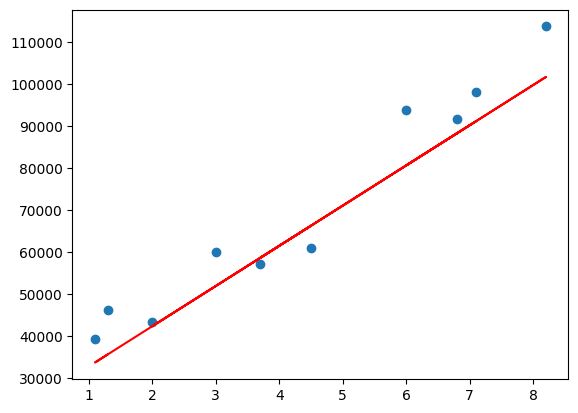

In [149]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,train_pred,color='red')
plt.show()